# Luis Maximiliano López Ramírez

# Actividad: Modulo 2 - 8. Dense + Dropout + Batch Normalization

### Problem Statement
You are a data scientist working for a school

You are asked to predict the GPA of the current students based on the following provided data:

 0   StudentID  int64  
 1   Age    int64  
 2   Gender int64  
 3   Ethnicity  int64  
 4   ParentalEducation  int64  
 5   StudyTimeWeekly    float64
 6   Absences   int64  
 7   Tutoring   int64  
 8   ParentalSupport    int64  
 9   Extracurricular    int64  
 10  Sports int64  
 11  Music  int64  
 12  Volunteering   int64  
 13  GPA    float64
 14  GradeClass float64

The GPA is the Grade Point Average, typically ranges from 0.0 to 4.0 in most educational systems, with 4.0 representing an 'A' or excellent performance.

The minimum passing GPA can vary by institution, but it's often around 2.0. This usually corresponds to a 'C' grade, which is considered satisfactory.

You need to create a Deep Learning model capable to predict the GPA of a Student based on a set of provided features.
The data provided represents 2,392 students.

In this excersice you will be requested to create a total of three models and select the most performant one.


### 1) Import Libraries

First let's import the following libraries, if there is any library that you need and is not in the list bellow feel free to include it

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


### 2) Load Data

- You will be provided with a cvs (comma separated value) file.
- You will need to add that file into a pandas dataframe, you can use the following code as reference
- The file will be available in canvas

In [54]:
data = pd.read_csv("Student_performance_data _.csv")
data

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


### 3) Review you data:

Make sure you review your data.
Place special attention of null or empty values.

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


### 4. Remove the columns not needed for Student performance prediction

- Choose only the columns you consider to be valuable for your model training.
- For example, StudentID might not be a good feature for your model, and thus should be removed from your main dataset, which other columns should also be removed?
- You can name that final dataset as 'dataset'

In [56]:
# Your code here
dataset = data.drop(['StudentID', 'Gender', 'Ethnicity'], axis=1)

### 5. Check if the columns has any null values:
- Here you now have your final dataset to use in your model training.
- Before moving foward review your data check for any null or empty value that might be needed to be removed

In [57]:
# Your code here
dataset.isnull().sum()

Age                  0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

### 6. Prepare your data for training and for testing set:
 - First create a dataset named X, with all columns but GPA. These are the features
 - Next create another dataset named y, with only GPA column. This is the label
 - If you go to your Imports, you will see the following import: **'from sklearn.model_selection import train_test_split'**
 - Use that *train_test_split* function to create: X_train, X_test, y_train and y_test respectively. Use X and y datasets as parameters. Other parameters to use are: Test Size = 0.2, Random State = 42.

 - Standarize your features (X_train and X_test) by using the StandardScaler (investigate how to use fit_transform and transform functions). This will help the training process by dealing with normilized data.

 Note: Your X_train shape should be around (1913, 10). This means the dataset has 10 columns which should be the input.

In [58]:
# Your code here
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Crear el dataset X con todas las columnas excepto 'GPA' (las características)
X = dataset.drop(['GPA'], axis=1)

# Crear el dataset y con solo la columna 'GPA' (la etiqueta)
y = dataset['GPA']

# Dividir los datos en conjuntos de entrenamiento y prueba con train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar la forma de los conjuntos para asegurarse que X_train tiene 11 columnas
print(f"X_train shape: {X_train.shape}")  # Debería ser (1913, 11)

# Estandarizar las características (X_train y X_test) usando StandardScaler
scaler = StandardScaler()

# Ajustar y transformar el conjunto de entrenamiento
X_train = scaler.fit_transform(X_train)

# Transformar el conjunto de prueba con el mismo escalador
X_test = scaler.transform(X_test)

X_train shape: (1913, 11)


### 7. Define your Deep Neural Network.
- This will be a Sequential Neural Network.
- With a Dense input layer with 64 units, and input dimention of 10 and Relu as the activation function.
- A Dense hidden layer with 32 units, and Relu as the activation function.
- And a Dense output layer with 1 unit, do not define an activation function so it defaults to linear, suitable for regression tasks. e.g. Dense(1)

This last part of the output layer is super important, since we want to predict the GPA, this means that we want a regression and not a classification. Linear activation function is best for regression and Sigmoid is best for Binary Classification

# Experiment 1: A single Dense Hidden Layer

In [59]:
# Your code here

# Definir la Red Neuronal Secuencial con una sola capa oculta
model = Sequential([
    Dense(64, input_dim=11, activation='relu'),  # Capa de entrada y oculta con 64 unidades y activación ReLU
    Dense(1)  # Capa de salida con 1 unidad (predicción), activación lineal por defecto
])

# Verificar la estructura del modelo
model.summary()

c:\Users\luism\Escritorio\Documetos_2\Entornos Virtuales\RetoConcentracion\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 833 (3.25 KB)

 Trainable params: 833 (3.25 KB)

 Non-trainable params: 0 (0.00 B)

*   Capa de entrada/oculta: Se mantiene una sola capa con 64 unidades y activación relu, que actúa tanto como capa de entrada y oculta.
*   Capa de salida: Tiene una unidad de salida para la predicción, con activación lineal por defecto (útil para problemas de regresión).

In [60]:
### 8. Compile your Neural Network

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Mostrar la arquitectura del modelo
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 833 (3.25 KB)

 Trainable params: 833 (3.25 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
### 9. Fit (or train) your model

# Entrenar el modelo con X_train y y_train
history = model.fit(
    X_train,              # Conjunto de entrenamiento de características
    y_train,              # Conjunto de entrenamiento de etiquetas (GPA)
    epochs=50,            # Número de iteraciones (épocas)
    batch_size=10,        # Tamaño del batch
    validation_split=0.2, # Porcentaje de datos de entrenamiento para validación
    verbose=1             # Mostrar el progreso durante el entrenamiento
)

Epoch 1/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.3751 - mean_absolute_error: 1.6085 - val_loss: 0.2170 - val_mean_absolute_error: 0.3863
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - loss: 0.1819 - mean_absolute_error: 0.3426 - val_loss: 0.1179 - val_mean_absolute_error: 0.2835
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - loss: 0.0972 - mean_absolute_error: 0.2504 - val_loss: 0.0847 - val_mean_absolute_error: 0.2389
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - loss: 0.0775 - mean_absolute_error: 0.2253 - val_loss: 0.0704 - val_mean_absolute_error: 0.2178
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step - loss: 0.0628 - mean_absolute_error: 0.2026 - val_loss: 0.0621 - val_mean_absolute_error: 0.2031
Epoch 6/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - loss: 0.0573 - mean_absolute_error: 0.1935 - val_loss: 0.0571 - val_mean_absolute_error: 0.1948
Epoch 7/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - loss: 0.0504 - mean_absolute_error

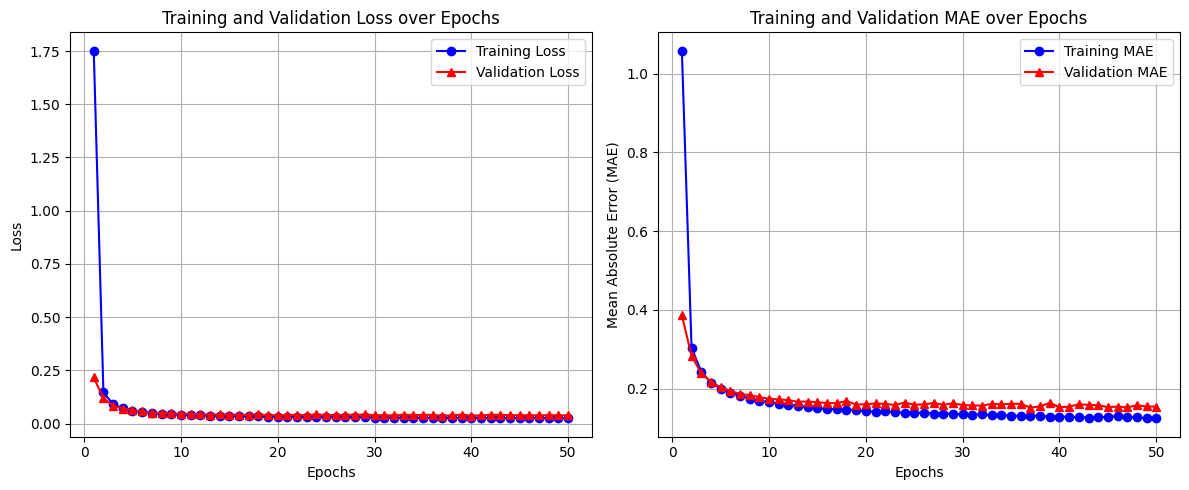

In [62]:
### 10. View your history variable:

# Obtener los datos del historial de entrenamiento
history_dict = history.history

# Extraer los datos para los gráficos
loss = history_dict['loss']  # Pérdida en entrenamiento
val_loss = history_dict['val_loss']  # Pérdida en validación
mae = history_dict['mean_absolute_error']  # MAE en entrenamiento
val_mae = history_dict['val_mean_absolute_error']  # MAE en validación

# Crear una lista de épocas para el eje X
epochs = range(1, len(loss) + 1)

# Gráfico 1: Pérdida de entrenamiento y validación
plt.figure(figsize=(12, 5))  # Definir el tamaño de la figura

plt.subplot(1, 2, 1)  # Crear un subplot para el primer gráfico
plt.plot(epochs, loss, 'bo-', label='Training Loss')  # 'bo-' = círculo azul para Training Loss
plt.plot(epochs, val_loss, 'r^-', label='Validation Loss')  # 'r^-' = triángulo rojo para Validation Loss
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()  # Mostrar la leyenda
plt.grid(True)  # Mostrar la cuadrícula

# Gráfico 2: MAE de entrenamiento y validación
plt.subplot(1, 2, 2)  # Crear un subplot para el segundo gráfico
plt.plot(epochs, mae, 'bo-', label='Training MAE')  # 'bo-' = círculo azul para Training MAE
plt.plot(epochs, val_mae, 'r^-', label='Validation MAE')  # 'r^-' = triángulo rojo para Validation MAE
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training and Validation MAE over Epochs')
plt.legend()  # Mostrar la leyenda
plt.grid(True)  # Mostrar la cuadrícula

# Mostrar ambos gráficos
plt.tight_layout()
plt.show()

In [63]:
### 11. Evaluate your model:

# Evaluar el modelo en el conjunto de prueba
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)

# Mostrar los resultados
print(f"Test Loss: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0405 - mean_absolute_error: 0.1535 
Test Loss: 0.0384
Test MAE: 0.1521



*   Un valor bajo de test_loss indica que el modelo se ajusta bien a los datos.

*   Si el MAE en el conjunto de prueba es bajo y similar al MAE de validación, el modelo generaliza bien.

*   El MAE te dice cuánto se desvía en promedio el modelo del valor real. Por ejemplo, si test_mae = 0.1, significa que el modelo se desvía, en promedio, 0.1 puntos de GPA del valor real.

In [64]:
### 12. Use your model to make some predictions:

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Mostrar cada predicción junto con su valor real correspondiente
for i in range(10):  # Muestra las primeras 10 predicciones y valores reales
    print(f"Predicted GPA: {y_pred[i][0]:.4f} \t Actual GPA: {y_test.iloc[i]:.4f}")


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Predicted GPA: 1.3109 	 Actual GPA: 1.4277
Predicted GPA: 2.9767 	 Actual GPA: 3.1174
Predicted GPA: 1.9882 	 Actual GPA: 2.0378
Predicted GPA: 3.5744 	 Actual GPA: 3.5485
Predicted GPA: 0.2102 	 Actual GPA: 0.2490
Predicted GPA: 2.7624 	 Actual GPA: 2.6277
Predicted GPA: 1.6571 	 Actual GPA: 2.0574
Predicted GPA: 2.4684 	 Actual GPA: 2.2483
Predicted GPA: 2.1145 	 Actual GPA: 2.1947
Predicted GPA: 0.9253 	 Actual GPA: 0.7582


# Experiment 2: A set of three Dense Hidden Layers

In [65]:
# Definir la Red Neuronal Secuencial con tres capas densas ocultas
model = Sequential([
    Dense(128, input_dim=11, activation='relu'),  # Primera capa oculta con 128 unidades y activación ReLU
    Dense(64, activation='relu'),  # Segunda capa oculta con 64 unidades y activación ReLU
    Dense(32, activation='relu'),  # Tercera capa oculta con 32 unidades y activación ReLU
    Dense(1)  # Capa de salida con 1 unidad (predicción), activación lineal por defecto
])

# Verificar la estructura del modelo
model.summary()

c:\Users\luism\Escritorio\Documetos_2\Entornos Virtuales\RetoConcentracion\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,905 (46.50 KB)

 Trainable params: 11,905 (46.50 KB)

 Non-trainable params: 0 (0.00 B)

*   Primera capa oculta: Tiene 128 unidades y usa relu como función de activación.
*   Segunda capa oculta: Tiene 64 unidades con la misma función de activación.
*   Tercera capa oculta: Tiene 32 unidades y también utiliza relu.
*   Capa de salida: Tiene 1 unidad para predicción, con activación lineal por defecto (adecuada para problemas de regresión).

In [66]:
### 8. Compile your Neural Network

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Mostrar la arquitectura del modelo
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,905 (46.50 KB)

 Trainable params: 11,905 (46.50 KB)

 Non-trainable params: 0 (0.00 B)

In [67]:
### 9. Fit (or train) your model

# Entrenar el modelo con X_train y y_train
history = model.fit(
    X_train,              # Conjunto de entrenamiento de características
    y_train,              # Conjunto de entrenamiento de etiquetas (GPA)
    epochs=50,            # Número de iteraciones (épocas)
    batch_size=10,        # Tamaño del batch
    validation_split=0.2, # Porcentaje de datos de entrenamiento para validación
    verbose=1             # Mostrar el progreso durante el entrenamiento
)

Epoch 1/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4164 - mean_absolute_error: 0.8532 - val_loss: 0.0798 - val_mean_absolute_error: 0.2364
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0727 - mean_absolute_error: 0.2186 - val_loss: 0.0587 - val_mean_absolute_error: 0.2004
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - loss: 0.0538 - mean_absolute_error: 0.1882 - val_loss: 0.0502 - val_mean_absolute_error: 0.1841
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - loss: 0.0435 - mean_absolute_error: 0.1657 - val_loss: 0.0491 - val_mean_absolute_error: 0.1773
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - loss: 0.0372 - mean_absolute_error: 0.1558 - val_loss: 0.0478 - val_mean_absolute_error: 0.1721
Epoch 6/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - loss: 0.0365 - mean_absolute_error: 0.1530 - val_loss: 0.0462 - val_mean_absolute_error: 0.1699
Epoch 7/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - loss: 0.0334 - mean_absolute_error: 

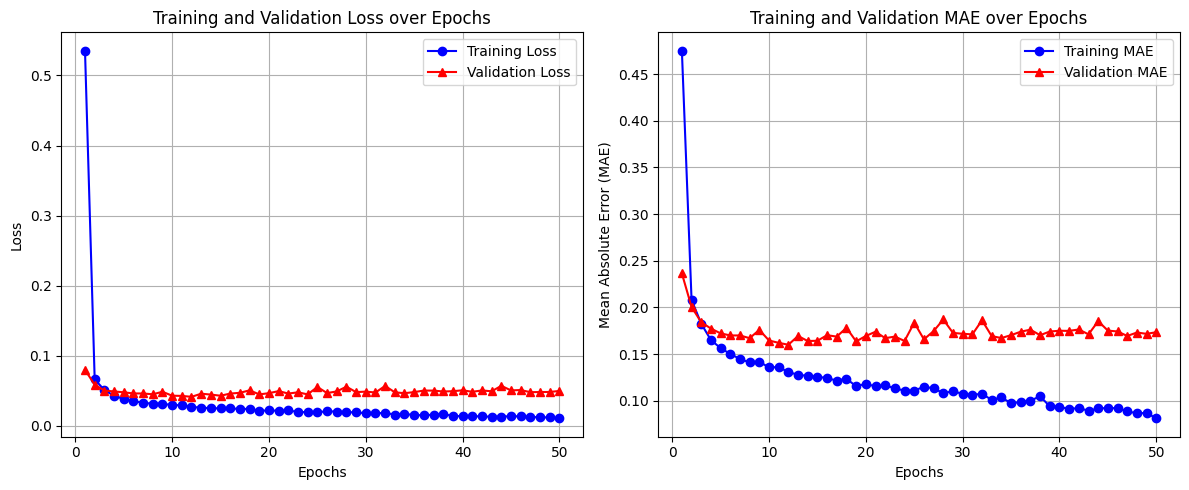

In [68]:
### 10. View your history variable:

# Obtener los datos del historial de entrenamiento
history_dict = history.history

# Extraer los datos para los gráficos
loss = history_dict['loss']  # Pérdida en entrenamiento
val_loss = history_dict['val_loss']  # Pérdida en validación
mae = history_dict['mean_absolute_error']  # MAE en entrenamiento
val_mae = history_dict['val_mean_absolute_error']  # MAE en validación

# Crear una lista de épocas para el eje X
epochs = range(1, len(loss) + 1)

# Gráfico 1: Pérdida de entrenamiento y validación
plt.figure(figsize=(12, 5))  # Definir el tamaño de la figura

plt.subplot(1, 2, 1)  # Crear un subplot para el primer gráfico
plt.plot(epochs, loss, 'bo-', label='Training Loss')  # 'bo-' = círculo azul para Training Loss
plt.plot(epochs, val_loss, 'r^-', label='Validation Loss')  # 'r^-' = triángulo rojo para Validation Loss
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()  # Mostrar la leyenda
plt.grid(True)  # Mostrar la cuadrícula

# Gráfico 2: MAE de entrenamiento y validación
plt.subplot(1, 2, 2)  # Crear un subplot para el segundo gráfico
plt.plot(epochs, mae, 'bo-', label='Training MAE')  # 'bo-' = círculo azul para Training MAE
plt.plot(epochs, val_mae, 'r^-', label='Validation MAE')  # 'r^-' = triángulo rojo para Validation MAE
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training and Validation MAE over Epochs')
plt.legend()  # Mostrar la leyenda
plt.grid(True)  # Mostrar la cuadrícula

# Mostrar ambos gráficos
plt.tight_layout()
plt.show()

In [69]:
### 11. Evaluate your model:

# Evaluar el modelo en el conjunto de prueba
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)

# Mostrar los resultados
print(f"Test Loss: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0562 - mean_absolute_error: 0.1832 
Test Loss: 0.0523
Test MAE: 0.1781



*   Un valor bajo de test_loss indica que el modelo se ajusta bien a los datos.

*   Si el MAE en el conjunto de prueba es bajo y similar al MAE de validación, el modelo generaliza bien.

*   El MAE te dice cuánto se desvía en promedio el modelo del valor real. Por ejemplo, si test_mae = 0.1, significa que el modelo se desvía, en promedio, 0.1 puntos de GPA del valor real.

In [70]:
### 12. Use your model to make some predictions:

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Mostrar cada predicción junto con su valor real correspondiente
for i in range(10):  # Muestra las primeras 10 predicciones y valores reales
    print(f"Predicted GPA: {y_pred[i][0]:.4f} \t Actual GPA: {y_test.iloc[i]:.4f}")


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Predicted GPA: 1.5592 	 Actual GPA: 1.4277
Predicted GPA: 2.8664 	 Actual GPA: 3.1174
Predicted GPA: 2.2037 	 Actual GPA: 2.0378
Predicted GPA: 3.6643 	 Actual GPA: 3.5485
Predicted GPA: 0.6247 	 Actual GPA: 0.2490
Predicted GPA: 2.6479 	 Actual GPA: 2.6277
Predicted GPA: 1.7483 	 Actual GPA: 2.0574
Predicted GPA: 2.0849 	 Actual GPA: 2.2483
Predicted GPA: 2.2335 	 Actual GPA: 2.1947
Predicted GPA: 0.8945 	 Actual GPA: 0.7582


# Experiment 3: Add a dropout layer after each Dense Hidden Layer

In [71]:
# Your code here

# Definir la Red Neuronal Secuencial con tres capas densas ocultas y capas de Dropout
model = Sequential([
    Dense(128, input_dim=11, activation='relu'),  # Primera capa oculta
    Dropout(0.3),  # Capa de Dropout con tasa de 30%
    Dense(64, activation='relu'),  # Segunda capa oculta
    Dropout(0.3),  # Capa de Dropout con tasa de 30%
    Dense(32, activation='relu'),  # Tercera capa oculta
    Dropout(0.3),  # Capa de Dropout con tasa de 30%
    Dense(1)  # Capa de salida con 1 unidad (predicción)
])

# Verificar la estructura del modelo
model.summary()

c:\Users\luism\Escritorio\Documetos_2\Entornos Virtuales\RetoConcentracion\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,905 (46.50 KB)

 Trainable params: 11,905 (46.50 KB)

 Non-trainable params: 0 (0.00 B)

*   Dropout(0.3): Inserta una capa de Dropout con una tasa del 30% después de cada capa densa oculta. Esto significa que el 30% de las unidades de cada capa se desactivan aleatoriamente durante el entrenamiento para evitar el sobreajuste.
*   Capas densas: Cada capa oculta tiene una función de activación relu, lo cual es común para redes profundas.
*   Capa de salida: Tiene 1 unidad y la activación lineal por defecto para problemas de regresión.

In [72]:
### 8. Compile your Neural Network

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Mostrar la arquitectura del modelo
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,905 (46.50 KB)

 Trainable params: 11,905 (46.50 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
### 9. Fit (or train) your model

# Entrenar el modelo con X_train y y_train
history = model.fit(
    X_train,              # Conjunto de entrenamiento de características
    y_train,              # Conjunto de entrenamiento de etiquetas (GPA)
    epochs=50,            # Número de iteraciones (épocas)
    batch_size=10,        # Tamaño del batch
    validation_split=0.2, # Porcentaje de datos de entrenamiento para validación
    verbose=1             # Mostrar el progreso durante el entrenamiento
)

Epoch 1/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.8187 - mean_absolute_error: 1.0500 - val_loss: 0.2112 - val_mean_absolute_error: 0.3842
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5240 - mean_absolute_error: 0.5669 - val_loss: 0.1500 - val_mean_absolute_error: 0.3223
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3903 - mean_absolute_error: 0.4890 - val_loss: 0.1385 - val_mean_absolute_error: 0.3133
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3458 - mean_absolute_error: 0.4564 - val_loss: 0.0928 - val_mean_absolute_error: 0.2481
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - loss: 0.3104 - mean_absolute_error: 0.4325 - val_loss: 0.1177 - val_mean_absolute_error: 0.2878
Epoch 6/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2481 - mean_absolute_error: 0.3895 - val_loss: 0.1026 - val_mean_absolute_error: 0.2628
Epoch 7/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - loss: 0.2490 - mean_absolute_error: 0.3864

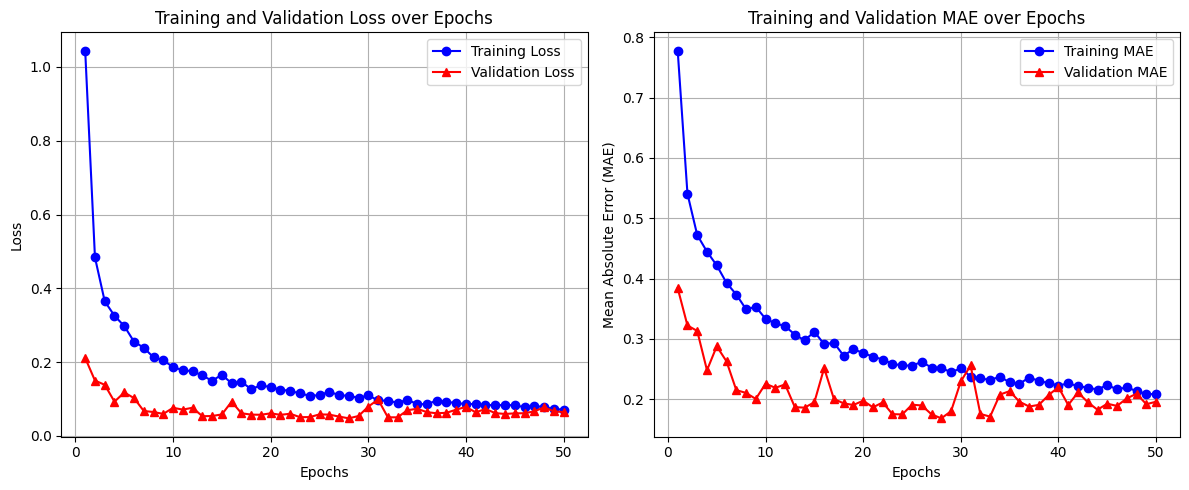

In [74]:
### 10. View your history variable:

# Obtener los datos del historial de entrenamiento
history_dict = history.history

# Extraer los datos para los gráficos
loss = history_dict['loss']  # Pérdida en entrenamiento
val_loss = history_dict['val_loss']  # Pérdida en validación
mae = history_dict['mean_absolute_error']  # MAE en entrenamiento
val_mae = history_dict['val_mean_absolute_error']  # MAE en validación

# Crear una lista de épocas para el eje X
epochs = range(1, len(loss) + 1)

# Gráfico 1: Pérdida de entrenamiento y validación
plt.figure(figsize=(12, 5))  # Definir el tamaño de la figura

plt.subplot(1, 2, 1)  # Crear un subplot para el primer gráfico
plt.plot(epochs, loss, 'bo-', label='Training Loss')  # 'bo-' = círculo azul para Training Loss
plt.plot(epochs, val_loss, 'r^-', label='Validation Loss')  # 'r^-' = triángulo rojo para Validation Loss
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()  # Mostrar la leyenda
plt.grid(True)  # Mostrar la cuadrícula

# Gráfico 2: MAE de entrenamiento y validación
plt.subplot(1, 2, 2)  # Crear un subplot para el segundo gráfico
plt.plot(epochs, mae, 'bo-', label='Training MAE')  # 'bo-' = círculo azul para Training MAE
plt.plot(epochs, val_mae, 'r^-', label='Validation MAE')  # 'r^-' = triángulo rojo para Validation MAE
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training and Validation MAE over Epochs')
plt.legend()  # Mostrar la leyenda
plt.grid(True)  # Mostrar la cuadrícula

# Mostrar ambos gráficos
plt.tight_layout()
plt.show()

In [75]:
### 11. Evaluate your model:

# Evaluar el modelo en el conjunto de prueba
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)

# Mostrar los resultados
print(f"Test Loss: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0613 - mean_absolute_error: 0.1875
Test Loss: 0.0612
Test MAE: 0.1878



*   Un valor bajo de test_loss indica que el modelo se ajusta bien a los datos.

*   Si el MAE en el conjunto de prueba es bajo y similar al MAE de validación, el modelo generaliza bien.

*   El MAE te dice cuánto se desvía en promedio el modelo del valor real. Por ejemplo, si test_mae = 0.1, significa que el modelo se desvía, en promedio, 0.1 puntos de GPA del valor real.

In [76]:
### 12. Use your model to make some predictions:

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Mostrar cada predicción junto con su valor real correspondiente
for i in range(10):  # Muestra las primeras 10 predicciones y valores reales
    print(f"Predicted GPA: {y_pred[i][0]:.4f} \t Actual GPA: {y_test.iloc[i]:.4f}")


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Predicted GPA: 1.5412 	 Actual GPA: 1.4277
Predicted GPA: 2.9510 	 Actual GPA: 3.1174
Predicted GPA: 1.8327 	 Actual GPA: 2.0378
Predicted GPA: 3.4946 	 Actual GPA: 3.5485
Predicted GPA: 0.7657 	 Actual GPA: 0.2490
Predicted GPA: 2.6986 	 Actual GPA: 2.6277
Predicted GPA: 1.6716 	 Actual GPA: 2.0574
Predicted GPA: 2.3370 	 Actual GPA: 2.2483
Predicted GPA: 2.1842 	 Actual GPA: 2.1947
Predicted GPA: 1.1628 	 Actual GPA: 0.7582


# Experiment 4: Add a Batch Normalization Layer after each Dropout Layer.

In [77]:
# Your code here

# Definir la Red Neuronal Secuencial con tres capas densas ocultas y capas de Dropout
model = Sequential([
    Dense(128, input_dim=11, activation='relu'),  # Primera capa oculta
    Dropout(0.3),  # Capa de Dropout con tasa de 30%
    Dense(64, activation='relu'),  # Segunda capa oculta
    Dropout(0.3),  # Capa de Dropout con tasa de 30%
    Dense(32, activation='relu'),  # Tercera capa oculta
    Dropout(0.3),  # Capa de Dropout con tasa de 30%
    Dense(1)  # Capa de salida con 1 unidad (predicción)
])

# Verificar la estructura del modelo
model.summary()

c:\Users\luism\Escritorio\Documetos_2\Entornos Virtuales\RetoConcentracion\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,905 (46.50 KB)

 Trainable params: 11,905 (46.50 KB)

 Non-trainable params: 0 (0.00 B)

In [78]:
### 8. Compile your Neural Network

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Mostrar la arquitectura del modelo
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,905 (46.50 KB)

 Trainable params: 11,905 (46.50 KB)

 Non-trainable params: 0 (0.00 B)

*   BatchNormalization(): Se agrega después de cada capa de Dropout para normalizar las activaciones de la capa anterior, lo cual puede ayudar a acelerar el entrenamiento y estabilizar el proceso de aprendizaje.
*   Capas densas y Dropout: Las capas ocultas tienen activación relu, y las capas de Dropout ayudan a reducir el sobreajuste.

In [79]:
### 9. Fit (or train) your model

# Entrenar el modelo con X_train y y_train
history = model.fit(
    X_train,              # Conjunto de entrenamiento de características
    y_train,              # Conjunto de entrenamiento de etiquetas (GPA)
    epochs=50,            # Número de iteraciones (épocas)
    batch_size=10,        # Tamaño del batch
    validation_split=0.2, # Porcentaje de datos de entrenamiento para validación
    verbose=1             # Mostrar el progreso durante el entrenamiento
)

Epoch 1/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.1000 - mean_absolute_error: 1.1243 - val_loss: 0.1898 - val_mean_absolute_error: 0.3640
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4967 - mean_absolute_error: 0.5559 - val_loss: 0.2861 - val_mean_absolute_error: 0.4639
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4113 - mean_absolute_error: 0.4829 - val_loss: 0.1424 - val_mean_absolute_error: 0.3178
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - loss: 0.3484 - mean_absolute_error: 0.4637 - val_loss: 0.1379 - val_mean_absolute_error: 0.3141
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - loss: 0.2971 - mean_absolute_error: 0.4282 - val_loss: 0.0853 - val_mean_absolute_error: 0.2368
Epoch 6/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - loss: 0.2760 - mean_absolute_error: 0.4041 - val_loss: 0.0965 - val_mean_absolute_error: 0.2591
Epoch 7/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2441 - mean_absolute_error: 0.38

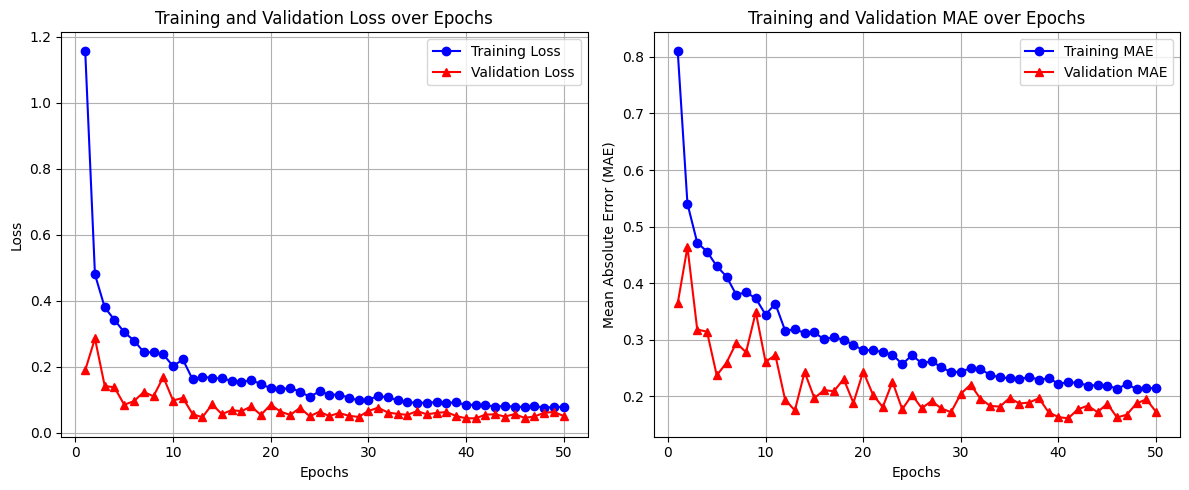

In [80]:
### 10. View your history variable:

# Obtener los datos del historial de entrenamiento
history_dict = history.history

# Extraer los datos para los gráficos
loss = history_dict['loss']  # Pérdida en entrenamiento
val_loss = history_dict['val_loss']  # Pérdida en validación
mae = history_dict['mean_absolute_error']  # MAE en entrenamiento
val_mae = history_dict['val_mean_absolute_error']  # MAE en validación

# Crear una lista de épocas para el eje X
epochs = range(1, len(loss) + 1)

# Gráfico 1: Pérdida de entrenamiento y validación
plt.figure(figsize=(12, 5))  # Definir el tamaño de la figura

plt.subplot(1, 2, 1)  # Crear un subplot para el primer gráfico
plt.plot(epochs, loss, 'bo-', label='Training Loss')  # 'bo-' = círculo azul para Training Loss
plt.plot(epochs, val_loss, 'r^-', label='Validation Loss')  # 'r^-' = triángulo rojo para Validation Loss
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()  # Mostrar la leyenda
plt.grid(True)  # Mostrar la cuadrícula

# Gráfico 2: MAE de entrenamiento y validación
plt.subplot(1, 2, 2)  # Crear un subplot para el segundo gráfico
plt.plot(epochs, mae, 'bo-', label='Training MAE')  # 'bo-' = círculo azul para Training MAE
plt.plot(epochs, val_mae, 'r^-', label='Validation MAE')  # 'r^-' = triángulo rojo para Validation MAE
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training and Validation MAE over Epochs')
plt.legend()  # Mostrar la leyenda
plt.grid(True)  # Mostrar la cuadrícula

# Mostrar ambos gráficos
plt.tight_layout()
plt.show()

In [81]:
### 11. Evaluate your model:

# Evaluar el modelo en el conjunto de prueba
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)

# Mostrar los resultados
print(f"Test Loss: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0513 - mean_absolute_error: 0.1720
Test Loss: 0.0493
Test MAE: 0.1682



*   Un valor bajo de test_loss indica que el modelo se ajusta bien a los datos.

*   Si el MAE en el conjunto de prueba es bajo y similar al MAE de validación, el modelo generaliza bien.

*   El MAE te dice cuánto se desvía en promedio el modelo del valor real. Por ejemplo, si test_mae = 0.1, significa que el modelo se desvía, en promedio, 0.1 puntos de GPA del valor real.

In [82]:
### 12. Use your model to make some predictions:

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Mostrar cada predicción junto con su valor real correspondiente
for i in range(10):  # Muestra las primeras 10 predicciones y valores reales
    print(f"Predicted GPA: {y_pred[i][0]:.4f} \t Actual GPA: {y_test.iloc[i]:.4f}")


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Predicted GPA: 1.4927 	 Actual GPA: 1.4277
Predicted GPA: 3.0712 	 Actual GPA: 3.1174
Predicted GPA: 1.8588 	 Actual GPA: 2.0378
Predicted GPA: 3.7106 	 Actual GPA: 3.5485
Predicted GPA: 0.6600 	 Actual GPA: 0.2490
Predicted GPA: 2.7283 	 Actual GPA: 2.6277
Predicted GPA: 1.6210 	 Actual GPA: 2.0574
Predicted GPA: 2.3329 	 Actual GPA: 2.2483
Predicted GPA: 2.1865 	 Actual GPA: 2.1947
Predicted GPA: 1.1051 	 Actual GPA: 0.7582


# Tabla comparativa de los 4 experimentos

In [84]:
import pandas as pd

# Crear un diccionario con los resultados de cada modelo
resultados_modelos = {
    'Arquitectura': [
        'Experiment 1: A single Dense Hidden Layer',
        'Experiment 2: A set of three Dense Hidden Layers',
        'Experiment 3: Add a dropout layer after each Dense Hidden Layer',
        'Experiment 4: Add a Batch Normalization Layer after each Dropout Layer'
    ],
    'Test Loss': [
        0.0384,
        0.0523,
        0.0612,
        0.0493
    ],
    'Test MAE': [
        0.1521,
        0.1781,
        0.1878,
        0.1682
    ]
}

# Crear un DataFrame a partir del diccionario
df_resultados = pd.DataFrame(resultados_modelos)

# Mostrar la tabla comparativa
print("Tabla Comparativa de Resultados y Arquitecturas de Modelos")
print(df_resultados)

# Visualizar el DataFrame como tabla si es necesario
df_resultados


Tabla Comparativa de Resultados y Arquitecturas de Modelos
                                        Arquitectura  Test Loss  Test MAE
0          Experiment 1: A single Dense Hidden Layer     0.0384    0.1521
1   Experiment 2: A set of three Dense Hidden Layers     0.0523    0.1781
2  Experiment 3: Add a dropout layer after each D...     0.0612    0.1878
3  Experiment 4: Add a Batch Normalization Layer ...     0.0493    0.1682


,Arquitectura,Test Loss,Test MAE
0,Experiment 1: A single Dense Hidden Layer,0.0384,0.1521
1,Experiment 2: A set of three Dense Hidden Layers,0.0523,0.1781
2,Experiment 3: Add a dropout layer after each D...,0.0612,0.1878
3,Experiment 4: Add a Batch Normalization Layer ...,0.0493,0.1682


# Interpretación de Resultados de los Modelos

Se realizaron varios experimentos para comparar el rendimiento de distintas arquitecturas de redes neuronales en términos de **Test Loss** y **Mean Absolute Error (MAE)**. A continuación, se presenta una interpretación detallada de los resultados:

- **Modelo con una capa oculta**: Este modelo presentó el mejor rendimiento con una **Test Loss** de 0.0384 y un **MAE** de 0.1521. Esto indica que una sola capa oculta fue suficiente para capturar la complejidad de los datos sin un sobreajuste significativo.

- **Modelo con 3 capas ocultas**: La inclusión de más capas ocultas aumentó tanto la **Test Loss** (0.0523) como el **MAE** (0.1781), lo cual sugiere que el modelo pudo haber experimentado sobreajuste o que la complejidad adicional no contribuyó al aprendizaje efectivo de los datos.

- **Modelo con capas de Dropout**: Este modelo mostró un incremento en la **Test Loss** (0.0612) y el **MAE** (0.1878), lo que indica que la tasa de **Dropout** pudo haber sido demasiado alta, afectando la capacidad del modelo para aprender de manera óptima.

- **Modelo con capas de Batch Normalization**: Este modelo tuvo un rendimiento mejorado en comparación con el modelo de 3 capas ocultas, con una **Test Loss** de 0.0493 y un **MAE** de 0.1682. La normalización de lotes parece haber estabilizado el entrenamiento y reducido la pérdida, aunque no logró superar al modelo con una capa oculta.

## Conclusión
El mejor modelo fue el **modelo con una capa oculta**, ya que presentó la menor **Test Loss** y **MAE**, demostrando ser suficiente para capturar la complejidad de los datos sin necesidad de estructuras más profundas y complejas. Este resultado sugiere que, en este caso, una arquitectura más simple fue más efectiva y menos propensa al sobreajuste.
